# Практика

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [98]:
exp_rv = sts.expon()
sample = exp_rv.rvs(10)
sample

array([3.46367586, 0.99364063, 0.04587203, 0.83286364, 1.15559372,
       0.06727708, 0.38872888, 3.74088514, 1.06512099, 2.23044145])

In [14]:
real_mean = exp_rv.mean() # настоящее среднее случайной величины

In [15]:
real_var = exp_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

In [90]:
def hist(ax, rv, sample_size):
    sample = rv.rvs(sample_size)
    ax.hist(sample, bins=50, density=True)
    x = np.linspace(sample.min(), sample.max(), sample_size)
    pdf = rv.pdf(x)
    ax.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
    ax.legend()

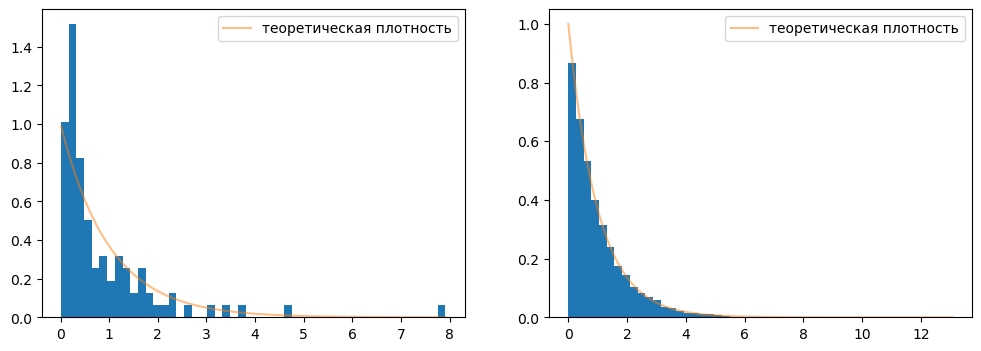

In [91]:
fig, [ax1, ax2] = plt.subplots(figsize=(12, 4), ncols=2)
hist(ax1, exp_rv, 100)
hist(ax2, exp_rv, 10000)

In [23]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.0519307407004326
1.0593273265660503


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

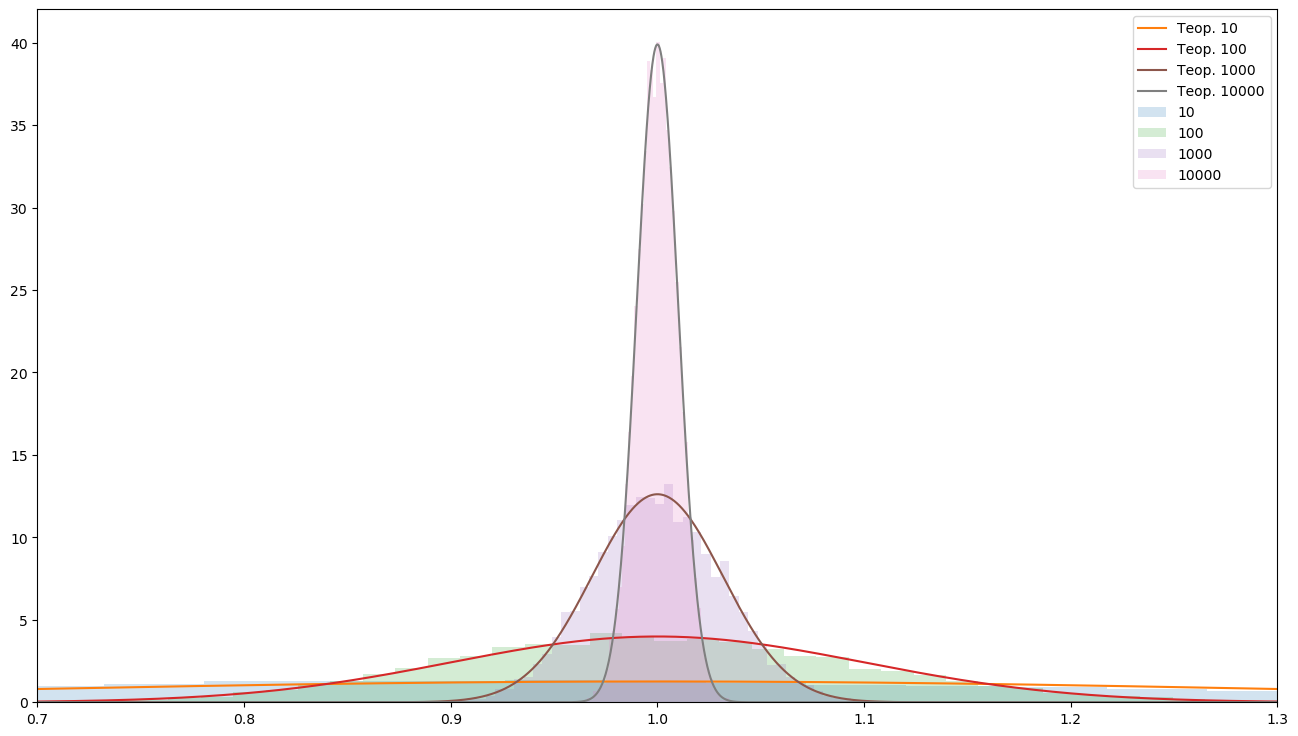

In [99]:
fig, ax = plt.subplots(figsize=(16,9))
nn = [10, 100, 1000, 10000]
for N in nn:
    means = []
    for i in range(10000):
         means.append(np.mean(exp_rv.rvs(N)))
    plt.hist(means, density=True, bins=50, alpha=0.2)
    
    norm_rv = sts.norm(loc=exp_rv.mean(), scale=exp_rv.std() / np.sqrt(N))
    x = np.linspace(0, 2, 10000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf)


ax.set_xlim([0.7, 1.3])
plt.legend(['Теор. ' + str(N) for N in nn] + nn)
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [97]:
апроксимация выборочного среднего для экспоненциального распределения работает достаточно хорошо

SyntaxError: invalid syntax (404507004.py, line 1)

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [2]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
